# Evaluation of A/B Test Results

The online store conducted an A/B test in which an enhanced recommendation system was introduced for a group of new users who registered between December 7th and December 21st. It is known that the test group consists of users from Europe, with log collection spanning from December 7th to January 4th, comprising no less than 15% of all new European users who registered between December 7th and 21st.

The project's objective is to assess the results of the A/B test.

Expected Effect: Within 14 days from the registration date, users are expected to show an improvement in each metric of at least 5%.

<h1>Project breakdown<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Loading" data-toc-modified-id="Data-Loading-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Loading</a></span></li><li><span><a href="#Test-Conduct-Validity" data-toc-modified-id="Test-Conduct-Validity-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Test Conduct Validity</a></span><ul class="toc-item"><li><span><a href="#User-Enrollment-Period-for-the-Test" data-toc-modified-id="User-Enrollment-Period-for-the-Test-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>User Enrollment Period for the Test</a></span></li><li><span><a href="#Region" data-toc-modified-id="Region-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Region</a></span></li><li><span><a href="#User-Enrollment-Dynamics-by-Groups" data-toc-modified-id="User-Enrollment-Dynamics-by-Groups-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>User Enrollment Dynamics by Groups</a></span></li><li><span><a href="#User-Overlaps" data-toc-modified-id="User-Overlaps-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>User Overlaps</a></span></li><li><span><a href="#interface_eu_test" data-toc-modified-id="interface_eu_test-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>interface_eu_test</a></span></li><li><span><a href="#User-Activity" data-toc-modified-id="User-Activity-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>User Activity</a></span></li><li><span><a href="#Lifetime.-Age-of-Events" data-toc-modified-id="Lifetime.-Age-of-Events-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Lifetime. Age of Events</a></span></li><li><span><a href="#Final-dataset" data-toc-modified-id="Final-dataset-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Final dataset</a></span></li></ul></li><li><span><a href="#Exploratory-Analysis" data-toc-modified-id="Exploratory-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Analysis</a></span><ul class="toc-item"><li><span><a href="#Event-Distribution-in-A-and-B" data-toc-modified-id="Event-Distribution-in-A-and-B-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Event Distribution in A and B</a></span></li><li><span><a href="#Event-Distribution-per-User" data-toc-modified-id="Event-Distribution-per-User-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Event Distribution per User</a></span></li><li><span><a href="#Marketing-Campaigns-influence" data-toc-modified-id="Marketing-Campaigns-influence-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Marketing Campaigns influence</a></span></li><li><span><a href="#Number-of-orders" data-toc-modified-id="Number-of-orders-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Number of orders</a></span></li><li><span><a href="#Average-Order-Value" data-toc-modified-id="Average-Order-Value-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Average Order Value</a></span></li><li><span><a href="#Funnel" data-toc-modified-id="Funnel-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Funnel</a></span></li><li><span><a href="#Statistical-Difference-in-User-Shares-at-Each-Funnel-Step" data-toc-modified-id="Statistical-Difference-in-User-Shares-at-Each-Funnel-Step-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Statistical Difference in User Shares at Each Funnel Step</a></span></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

## Data Loading

In [361]:
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import plotly.express as px
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import shapiro

In [362]:
try:
    calendar = pd.read_csv('https://code.s3.yandex.net/datasets/ab_project_marketing_events.csv')
    users = pd.read_csv('https://code.s3.yandex.net/datasets/final_ab_new_users.csv')
    logs = pd.read_csv('https://code.s3.yandex.net/datasets/final_ab_events.csv')
    test_users = pd.read_csv('https://code.s3.yandex.net/datasets/final_ab_participants.csv')
except FileNotFoundError:
    print("Ошибка: файлы не найдены.")
except Exception as e:
    print(f"Произошла ошибка: {str(e)}")

In [363]:
calendar.head(15)

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


In [364]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


In the "calendar" dataset, marketing events are stored. The user cohort participating in the test ranges from December 7th to December 21st, with logs collected between December 7th and January 4th. Consequently, the event that could have occurred during this period is the "Christmas & New Year Promo" for the EU region.

There are no missing values in the data; we will format the dates accordingly.

In [365]:
calendar['start_dt'] = pd.to_datetime(calendar['start_dt'])
calendar['finish_dt'] = pd.to_datetime(calendar['finish_dt'])

In [366]:
users.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [367]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB


In [368]:
users['first_date'] = pd.to_datetime(users['first_date'])

In [369]:
display(users['first_date'].min())
display(users['first_date'].max())
display(users['region'].unique())
display(users['device'].unique())
users['user_id'].nunique()

Timestamp('2020-12-07 00:00:00')

Timestamp('2020-12-23 00:00:00')

array(['EU', 'N.America', 'APAC', 'CIS'], dtype=object)

array(['PC', 'Android', 'iPhone', 'Mac'], dtype=object)

61733

In [370]:
users[users.duplicated()]

,user_id,first_date,region,device


The "users" dataset contains all users who registered from December 7th to December 23rd.

- There are a total of 61,733 unique users.
- They come from the regions EU, N. America, APAC, and CIS.
- Registrations occurred from various devices: PC, Android, iPhone, and Mac.
- There are no missing data, and there are no duplicates.
- The data type in the "first_date" field has been converted to a date format for convenience.

In [371]:
display(logs.head())
logs.info()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     440317 non-null  object 
 1   event_dt    440317 non-null  object 
 2   event_name  440317 non-null  object 
 3   details     62740 non-null   float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


In [372]:
logs['event_dt'] = pd.to_datetime(logs['event_dt'])

In [373]:
display(logs['event_dt'].min())
display(logs['event_dt'].max())
display(logs['event_name'].unique())
display(logs['details'].unique())
logs['user_id'].nunique()

Timestamp('2020-12-07 00:00:33')

Timestamp('2020-12-30 23:36:33')

array(['purchase', 'product_cart', 'product_page', 'login'], dtype=object)

array([ 99.99,   9.99,   4.99, 499.99,    nan])

58703

In [374]:
logs.groupby('event_name')['user_id'].count()

event_name
login           189552
product_cart     62462
product_page    125563
purchase         62740
Name: user_id, dtype: int64

In [375]:
logs[logs.duplicated()]

,user_id,event_dt,event_name,details


The "logs" dataset contains data from December 7th to December 30th, even though the test's end date is mentioned as January 4th. It's possible that there were no actions after December 30th.

- This table contains 440,317 rows with actions from 58,703 users during this period.
- It's worth noting that the "users" table lists 61,733 registered users, but there are logs for only 58,703. (Does this mean 3,030 users are inactive?)
- The event types in the table are login, product_cart, product_page, and purchase.
- The number of purchases equals the number of filled rows in the "details" field, which stores the purchase cost.
- Dates have been formatted appropriately.
- There are no duplicates or missing values, except for the "details" field.

In [376]:
display(test_users.head())
test_users.info()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB


In [377]:
display(test_users['ab_test'].unique())
display(test_users['group'].unique())
test_users['user_id'].nunique()

array(['recommender_system_test', 'interface_eu_test'], dtype=object)

array(['A', 'B'], dtype=object)

16666

In [378]:
test_users[test_users.duplicated()]

,user_id,group,ab_test


In [379]:
test_users.groupby('ab_test')['user_id'].nunique()

ab_test
interface_eu_test          11567
recommender_system_test     6701
Name: user_id, dtype: int64

The "test_users" dataset contains information about test participants.

- There are a total of 18,268 rows and 16,666 unique users.
- Data is available for two test groups: "interface_eu_test" and "recommender_system_test."
- In total, the two test groups comprise 18,268 users. This indicates that users from one test overlap with users from the other.
- There are no data type issues or duplicates in this dataset.

## Test Conduct Validity

### User Enrollment Period for the Test

According to the project requirements, new users should have been enrolled from December 7th to December 21st. However, our user dataset contains records of users who registered from December 7th to 2020-12-23. Let's create a dataset that complies with the registration date condition.

In [380]:
start_date = '2020-12-07'
end_date = '2020-12-21'
users_dt = users[(users['first_date'] >= start_date) & (users['first_date'] <= end_date)]
users_dt['user_id'].nunique()

56470

In the new "users_dt" dataset, we have 56,470 users, with approximately 5,000 users removed as they do not fall within the analyzed period of new user enrollment.

### Region

As per the project requirements, the expected number of test participants is 15% of new users from the EU region. Let's verify if this condition is met.

In [381]:
#Creating a Dataset with the Appropriate Test Type
rec_users = test_users.query('ab_test=="recommender_system_test"')
rec_users.nunique()

user_id    6701
group         2
ab_test       1
dtype: int64

In [382]:
# Adding Data About Region, Dates, and Devices
rec_users = rec_users.merge(users_dt, on='user_id', how='left')
rec_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6701 entries, 0 to 6700
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     6701 non-null   object        
 1   group       6701 non-null   object        
 2   ab_test     6701 non-null   object        
 3   first_date  6701 non-null   datetime64[ns]
 4   region      6701 non-null   object        
 5   device      6701 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 366.5+ KB


In [383]:
# Filtering Users in the Test Group from the EU
eu_rec_users = rec_users.query('region=="EU"')
eu = eu_rec_users['user_id'].nunique()
eu

6351

In [384]:
#Calculating the Total Number of New Users in the EU
total_eu = users_dt.query('region=="EU"')
total_eu_users = total_eu['user_id'].nunique()
total_eu_users

42340

In [385]:
# Calculating the Share:
result = (eu/total_eu_users)*100
print(f"{result:.2f}% of new users from the EU are participating in the test")

15.00% of new users from the EU are participating in the test


### User Enrollment Dynamics by Groups

In [386]:
# Creating a Pivot Table for User Enrollment Dynamics
pivot_test_users = eu_rec_users.pivot_table(index='group', columns='first_date', values='user_id', aggfunc='nunique', fill_value=0)
# first_date as date
pivot_test_users.columns = pd.to_datetime(pivot_test_users.columns).strftime('%m-%d')
pivot_test_users

first_date,12-07,12-08,12-09,12-10,12-11,12-12,12-13,12-14,12-15,12-16,12-17,12-18,12-19,12-20,12-21
group,,,,,,,,,,,,,,,
A,349,186,143,189,157,268,323,366,202,160,202,210,226,255,398
B,259,149,105,181,106,198,228,262,141,114,138,172,173,206,285


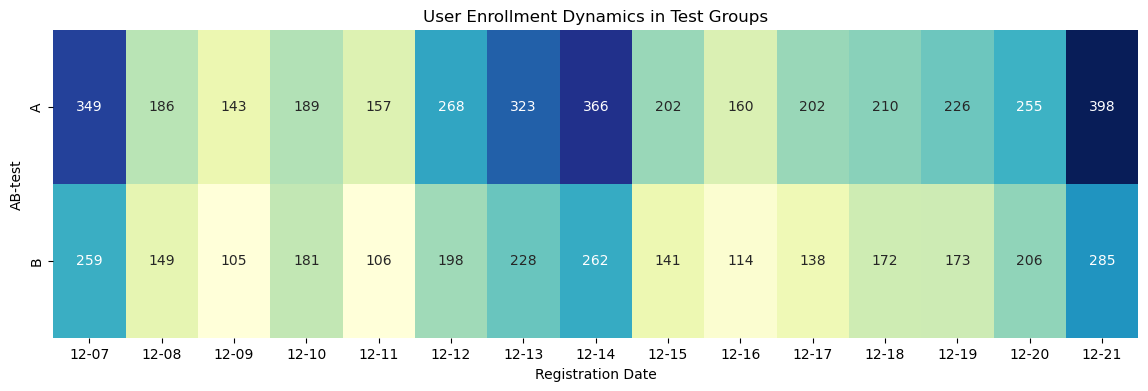

In [387]:
# Visualizing User Enrollment Dynamics
plt.figure(figsize=(14, 4))
sns.heatmap(pivot_test_users, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.title('User Enrollment Dynamics in Test Groups')
plt.xlabel('Registration Date')
plt.ylabel('AB-test')
plt.show()

In [388]:
group_counts = eu_rec_users['group'].value_counts()
print("Number of users in each test group:")
group_counts

Number of users in each test group:


A    3634
B    2717
Name: group, dtype: int64

To understand the enrollment dynamics by day of the week, we create a new column representing the day of the week and visualize the registration counts for each day:

In [389]:
eu_rec_users.loc[:, 'day_of_week'] = eu_rec_users['first_date'].dt.weekday
day_of_week_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

# Using .loc[] to create a new column with text labels for days of the week
eu_rec_users.loc[:, 'day_of_week_text'] = eu_rec_users['day_of_week'].map(day_of_week_mapping)
eu_rec_users = eu_rec_users.drop(columns=['day_of_week'])
eu_rec_users.head()

/var/folders/jl/p8x17ssj4h71lnjgz17cp51c0000gn/T/ipykernel_82456/3802195521.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/jl/p8x17ssj4h71lnjgz17cp51c0000gn/T/ipykernel_82456/3802195521.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,user_id,group,ab_test,first_date,region,device,day_of_week_text
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,Monday
1,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,iPhone,Sunday
2,DABC14FDDFADD29E,A,recommender_system_test,2020-12-08,EU,Mac,Tuesday
3,04988C5DF189632E,A,recommender_system_test,2020-12-14,EU,iPhone,Monday
4,482F14783456D21B,B,recommender_system_test,2020-12-14,EU,PC,Monday


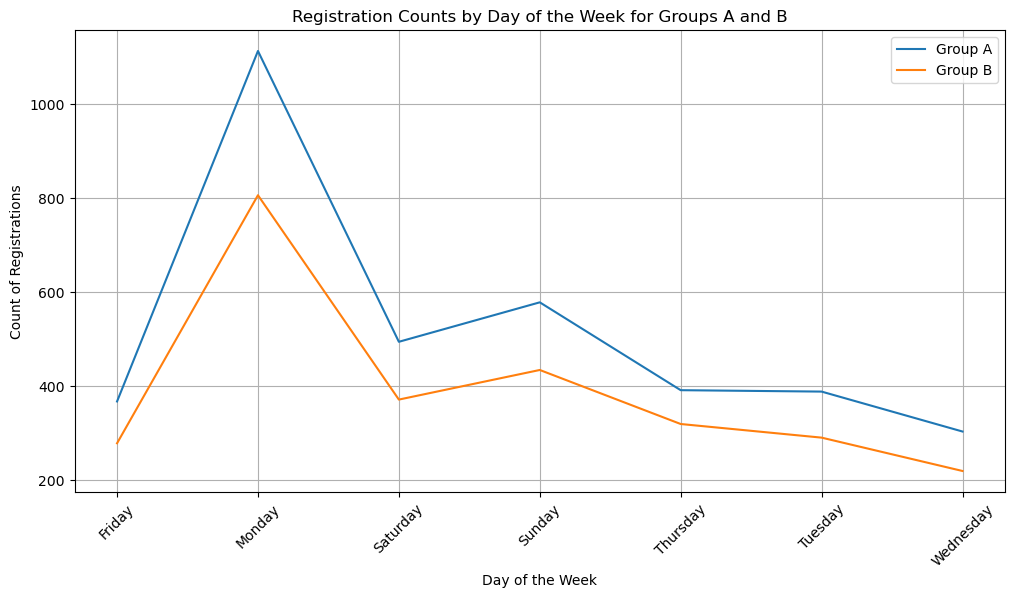

In [390]:
# Grouping Data and Counting Events
reg_counts = eu_rec_users.groupby(['group', 'day_of_week_text'])['user_id'].count().reset_index()

#  Creating a Graph
plt.figure(figsize=(12, 6))
for group in reg_counts['group'].unique():
    data_group = reg_counts[reg_counts['group'] == group]
    plt.plot(data_group['day_of_week_text'], data_group['user_id'], label=f'Group {group}')

plt.title('Registration Counts by Day of the Week for Groups A and B')
plt.xlabel('Day of the Week')
plt.ylabel('Count of Registrations')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

**Observations:**

Mondays and weekends (Saturdays and Sundays) are the most popular days for new user registrations. The dynamics of groups A and B do not differ significantly; their lines closely mirror each other.

### User Overlaps

First, we check for overlaps between users in groups A and B:

In [391]:
users_in_group_A = set(eu_rec_users[eu_rec_users['group'] == 'A']['user_id'])
users_in_group_B = set(eu_rec_users[eu_rec_users['group'] == 'B']['user_id'])

common_users = users_in_group_A.intersection(users_in_group_B)

if len(common_users) == 0:
    print("There are no common users between Group A and Group B.")
else:
    count_common_users = len(common_users)
    print(f"There are {count_common_users} common users between Group A and Group B.")

There are no common users between Group A and Group B.


As a second step, we check for overlaps between users in different tests since it is known that the "test_users" dataset contains data about two tests:

In [392]:
users_in_r = set(test_users[test_users['ab_test'] == 'recommender_system_test']['user_id'])
users_in_i = set(test_users[test_users['ab_test'] == 'interface_eu_test']['user_id'])

common_users = users_in_r.intersection(users_in_i)

if len (common_users) == 0:
    print("There are no common users between the recommender_system_test and interface_eu_test groups.")
else:
    count_common_users = len(common_users)
    print(f"There are {count_common_users} common users between the recommender_system_test and interface_eu_test groups.")

There are 1602 common users between the recommender_system_test and interface_eu_test groups.


In [393]:
print(f"The percentage of users participating in both A/B tests: {(count_common_users/len(eu_rec_users)*100):.2f}%")

The percentage of users participating in both A/B tests: 25.22%


**Observations:**

More than 25% of users in our tests overlap. Removing 25% of users would reduce the test's statistical power. Therefore, let's take a closer look at "interface_eu_test" to determine if we can use users from this test in our research.

### interface_eu_test

Based on the name, it appears that the test was also conducted for the EU region. The specific dates and the purpose of the test are unknown. It is clear that all users who were in Group A of the 'interface_eu_test' and later entered the 'recommender_system_test' can remain, as nothing influenced their behavior. Group A in 'interface_eu_test' serves as the control group. Let's examine how these users are distributed in 'interface_eu_test' and in our test

In [394]:
interface_users = test_users.query('ab_test=="interface_eu_test"')
interface_users = interface_users.merge(users, on='user_id', how='left')
interface_users['group'].value_counts()

A    5831
B    5736
Name: group, dtype: int64

In [395]:
display(interface_users['region'].value_counts())
display(interface_users['first_date'].min())
interface_users['first_date'].max()

EU    11567
Name: region, dtype: int64

Timestamp('2020-12-07 00:00:00')

Timestamp('2020-12-23 00:00:00')

In [396]:
interface_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11567 entries, 0 to 11566
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     11567 non-null  object        
 1   group       11567 non-null  object        
 2   ab_test     11567 non-null  object        
 3   first_date  11567 non-null  datetime64[ns]
 4   region      11567 non-null  object        
 5   device      11567 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 632.6+ KB


In total, 11,567 users registered from December 7th to December 23rd participated in "interface_eu_test."

Let's create a distribution chart that compares users from "interface_eu_test" with users from "recommender_system_test" based on dates and groups.

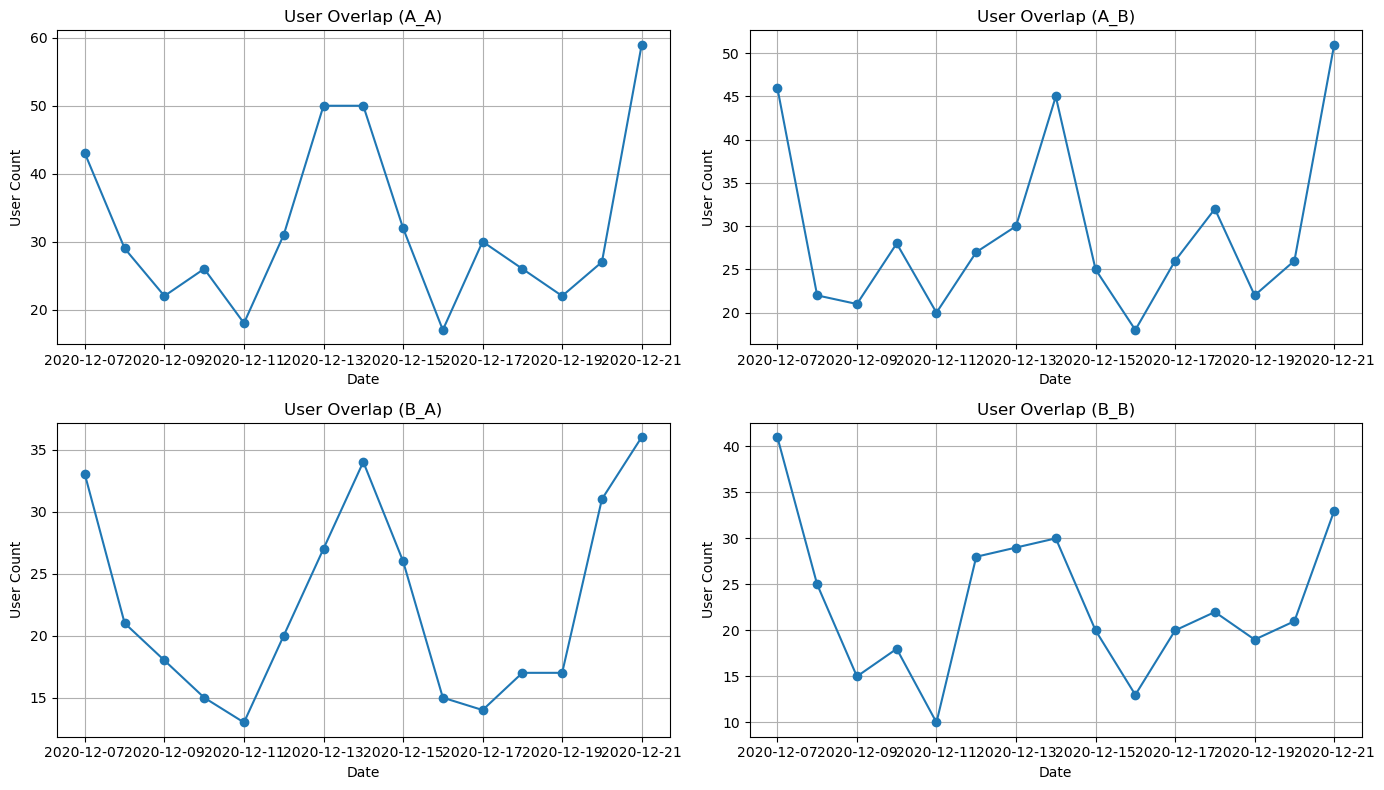

In [397]:
def plot_user_intersection(eu_rec_users, interface_users):
    groups = ['A', 'B']
    
    plt.figure(figsize=(14, 8))
    
    for i, group_eu in enumerate(groups):
        for j, group_interface in enumerate(groups):
            plt.subplot(2, 2, i*2+j+1)
            
            users_eu = set(eu_rec_users[eu_rec_users['group'] == group_eu]['user_id'])
            users_interface = set(interface_users[interface_users['group'] == group_interface]['user_id'])
            
            common_users = users_eu.intersection(users_interface)
            
            date_range = pd.date_range(start='2020-12-07', end='2020-12-21', freq='D')
            user_counts = [sum(1 for date in eu_rec_users[eu_rec_users['user_id'].isin(common_users)]['first_date'] if date == d) for d in date_range]
            
            plt.plot(date_range, user_counts, label=f'{group_eu}_{group_interface}', marker='o')
            plt.xlabel('Date')
            plt.ylabel('User Count')
            plt.title(f'User Overlap ({group_eu}_{group_interface})')
            plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Calling the function to create the graphs
plot_user_intersection(eu_rec_users, interface_users)


Уou can see that there are days when users from Group B of the competing test hardly overlapped with our test, but there are also peak days, such as December 7th, 21st, and 14th. Based on the graphs, it's challenging to draw conclusions about how evenly users are distributed across the groups in our test. Let's examine the proportions.

In [398]:
# Number of users in Group B of interface_eu_test
users_in_rec_A = eu_rec_users[eu_rec_users['group'] == 'A']['user_id'].nunique()
users_in_rec_B = eu_rec_users[eu_rec_users['group'] == 'B']['user_id'].nunique()

# Number of users in Group B of interface_eu_test who entered Group A of recommender_system_test
users_B_in_A_recommender = len(set(interface_users[interface_users['group'] == 'B']['user_id']).intersection(eu_rec_users[eu_rec_users['group'] == 'A']['user_id']))

# Number of users in Group B of interface_eu_test who entered Group B of recommender_system_test
users_B_in_B_recommender = len(set(interface_users[interface_users['group'] == 'B']['user_id']).intersection(eu_rec_users[eu_rec_users['group'] == 'B']['user_id']))

# Percentage of users from Group B of interface_eu_test who entered Group A of recommender_system_test
percent_B_in_A_recommender = (users_B_in_A_recommender / users_in_rec_A) * 100

# Percentage of users from Group B of interface_eu_test who entered Group B of recommender_system_test
percent_B_in_B_recommender = (users_B_in_B_recommender / users_in_rec_B) * 100

print(f"Percentage of users from Group B of interface_eu_test who entered Group A of recommender_system_test: {percent_B_in_A_recommender:.2f}%")
print(f"Percentage of users from Group B of interface_eu_test who entered Group B of recommender_system_test: {percent_B_in_B_recommender:.2f}%")

Percentage of users from Group B of interface_eu_test who entered Group A of recommender_system_test: 12.08%
Percentage of users from Group B of interface_eu_test who entered Group B of recommender_system_test: 12.66%


Now it's clear that 439 users from Group B of interface_eu_test entered Group A of recommender_system_test, which accounts for 12.08% of all users in the A test. Additionally, 344 users from Group B of interface_eu_test entered Group B of recommender_system_test, making up 12.66% of the total number of users in B recommender_system_test.

As a result, users are evenly distributed, and we can assume that their impact on recommender_system_test will be equally distributed in both Group A and Group B. We will not remove users from overlapping tests.

### User Activity

Let's merge the log table with our user table to focus only on relevant events

In [399]:
log_ab = eu_rec_users.merge(logs, on='user_id', how='left')
log_ab.info()
log_ab['user_id'].nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26290 entries, 0 to 26289
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           26290 non-null  object        
 1   group             26290 non-null  object        
 2   ab_test           26290 non-null  object        
 3   first_date        26290 non-null  datetime64[ns]
 4   region            26290 non-null  object        
 5   device            26290 non-null  object        
 6   day_of_week_text  26290 non-null  object        
 7   event_dt          23420 non-null  datetime64[ns]
 8   event_name        23420 non-null  object        
 9   details           3196 non-null   float64       
dtypes: datetime64[ns](2), float64(1), object(7)
memory usage: 2.2+ MB


6351

In [400]:
display(log_ab['event_dt'].min())
log_ab['event_dt'].max()

Timestamp('2020-12-07 00:05:57')

Timestamp('2020-12-30 12:42:57')

Users from our test (6351 unique users) performed 23,420 events from December 7th to December 30th. However, there are a total of 26,290 registered users, so 2,870 of them did not perform any actions after registration. Let's take a look at these users and their distribution across test groups.

In [401]:
# Filtering the data for users without actions (event_name is NaN)
users_with_no_actions = log_ab[log_ab['event_name'].isna()]

In [402]:
# Total number of unique users in groups A and B
total_A = log_ab[log_ab['group'] == 'A']['user_id'].nunique()
total_B = log_ab[log_ab['group'] == 'B']['user_id'].nunique()

# Number of unique users without actions in groups A and B
no_actions_A = users_with_no_actions[users_with_no_actions['group'] == 'A']['user_id'].nunique()
no_actions_B = users_with_no_actions[users_with_no_actions['group'] == 'B']['user_id'].nunique()

# Fraction of unique users without actions in groups A and B
fraction_A = no_actions_A / total_A
fraction_B = no_actions_B / total_B

# Displaying the results
print(f"Fraction of unique users without actions in group A: {fraction_A:.2%}")
print(f"Fraction of unique users without actions in group B: {fraction_B:.2%}")

Fraction of unique users without actions in group A: 28.34%
Fraction of unique users without actions in group B: 67.72%


In [403]:
users_with_no_actions['group'].value_counts()

B    1840
A    1030
Name: group, dtype: int64

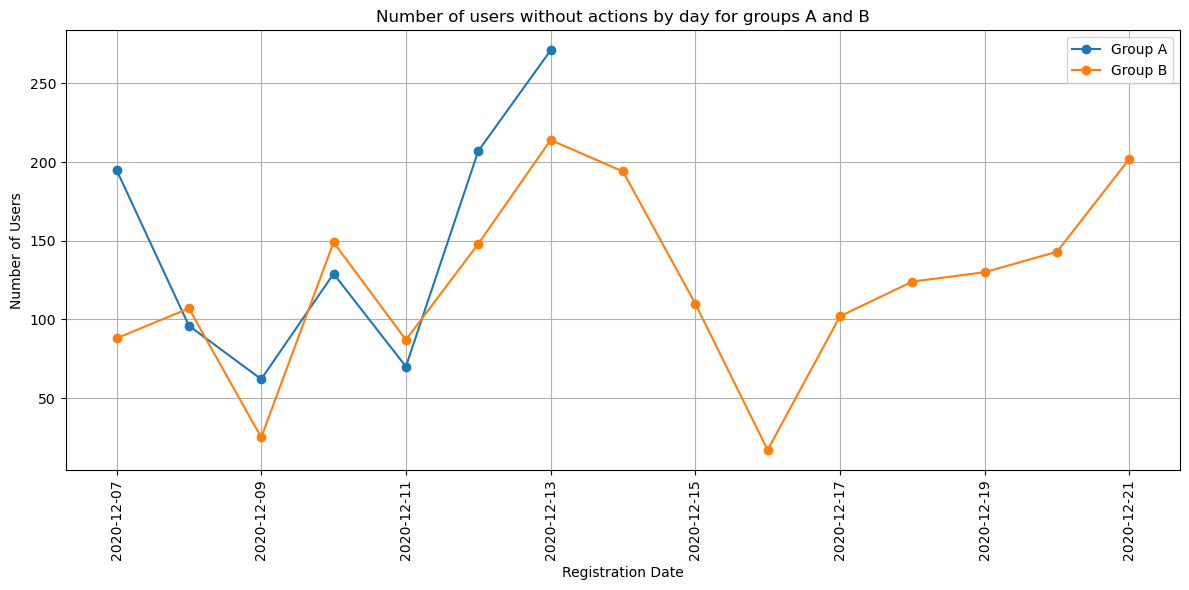

In [404]:
# Filtering data for groups A and B
no_actions_A = users_with_no_actions[users_with_no_actions['group'] == 'A']
no_actions_B = users_with_no_actions[users_with_no_actions['group'] == 'B']

# Grouping data and counting unique users per day
no_actions_by_day_A = no_actions_A.groupby('first_date')['user_id'].nunique()
no_actions_by_day_B = no_actions_B.groupby('first_date')['user_id'].nunique()

# Creating a figure and axes for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot for group A
plt.plot(no_actions_by_day_A.index, no_actions_by_day_A.values, label='Group A', marker='o')

# Plot for group B
plt.plot(no_actions_by_day_B.index, no_actions_by_day_B.values, label='Group B', marker='o')

ax.set_title('Number of users without actions by day for groups A and B')
ax.set_xlabel('Registration Date')
ax.set_ylabel('Number of Users')
ax.grid(True)
plt.legend()

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

It's clear that out of more than 6,000 users participating in the A/B test, approximately 2,800 (over 40% of the entire dataset) didn't perform any actions after registration. Interestingly, these users registered from December 7th to 13th in Group A and consistently registered in Group B throughout the entire period.

It would be interesting to check how many users without actions are there when considering all users and all logs.

In [405]:
df = users.merge(logs, on='user_id', how='left')
users_with_no_action= df[df['event_name'].isna()]
# Total number of unique users
t = df['user_id'].nunique()
# Number of unique users without actions
no_action = users_with_no_action['user_id'].nunique()
# Fraction of unique users without actions
fraction = no_action/ t
# Print the results
print(f"Fraction of unique users without actions : {fraction:.2%}")

Fraction of unique users without actions : 4.91%


A total of 4.91% of users registered from December 7th to December 23rd did not perform any actions from December 7th to December 30th. It's strange that users from our test have such a high percentage of registrations without subsequent activity. Since the distribution is uneven, and the percentage of such users is significant, it can be assumed that this is related to a logging error. It's better to exclude such data from the analysis. Let's examine the user lifetime, and then decide whether to remove these users or not.

### Lifetime. Age of Events

In [406]:
display(log_ab['event_dt'].max())
log_ab['event_dt'].min()

Timestamp('2020-12-30 12:42:57')

Timestamp('2020-12-07 00:05:57')

In the created dataset log_ab, events are stored from December 7th to December 30th, although the test conditions specify the test end date as January 4th. This means it was expected that each user would have a 14-day lifetime from their registration date. What should be done with users whose lifetime turned out to be shorter?

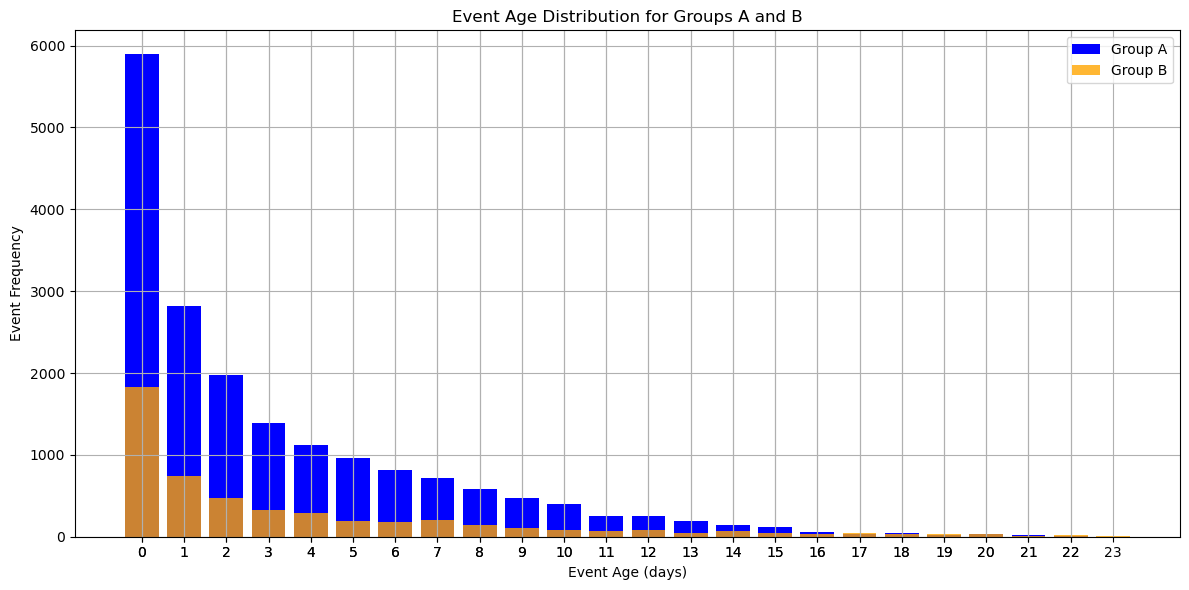

In [407]:
# Create a column for event age
log_ab['event_age'] = (log_ab['event_dt'] - log_ab['first_date']).dt.days

# Filter data for groups A and B
log_ab_group_A = log_ab[log_ab['group'] == 'A']
log_ab_group_B = log_ab[log_ab['group'] == 'B']

# Remove NaN values and get unique event_age values
event_ages_A = log_ab_group_A['event_age'].dropna().unique()
event_ages_B = log_ab_group_B['event_age'].dropna().unique()

# Sort them
event_ages_A.sort()
event_ages_B.sort()

# Create a figure and axes for the plot
plt.figure(figsize=(12, 6))

# Build a histogram of event age distribution for group A
plt.bar(event_ages_A, log_ab_group_A['event_age'].value_counts().loc[event_ages_A], color='blue', label='Group A')

# Build a histogram of event age distribution for group B
plt.bar(event_ages_B, log_ab_group_B['event_age'].value_counts().loc[event_ages_B], color='orange', alpha=0.8, label='Group B')

plt.title('Event Age Distribution for Groups A and B')
plt.xlabel('Event Age (days)')
plt.ylabel('Event Frequency')
plt.grid(True)

plt.legend()

# Add ticks to the X-axis
plt.xticks(list(event_ages_A) + list(event_ages_B))

plt.tight_layout()
plt.show()

Users perform the main events within the first few days, and the older the event, the less frequently it occurs. Users who registered after December 16th don't have the full 14 days, but since the main events happen in the first week, we won't remove users who haven't completed the full 14 days. It makes sense to remove events older than event_age = 13 because we are not considering their impact on the test group after 14 days. We'll also get rid of users who haven't taken any actions since they won't provide insights and won't affect the test results.

In [408]:
log_ab.info()
log_ab.query('event_age>13')['event_name'].count()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26290 entries, 0 to 26289
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           26290 non-null  object        
 1   group             26290 non-null  object        
 2   ab_test           26290 non-null  object        
 3   first_date        26290 non-null  datetime64[ns]
 4   region            26290 non-null  object        
 5   device            26290 non-null  object        
 6   day_of_week_text  26290 non-null  object        
 7   event_dt          23420 non-null  datetime64[ns]
 8   event_name        23420 non-null  object        
 9   details           3196 non-null   float64       
 10  event_age         23420 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(7)
memory usage: 2.4+ MB


800

In [409]:
log_ab_lt = log_ab.query('event_age<=13')
log_ab_lt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22620 entries, 0 to 26289
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           22620 non-null  object        
 1   group             22620 non-null  object        
 2   ab_test           22620 non-null  object        
 3   first_date        22620 non-null  datetime64[ns]
 4   region            22620 non-null  object        
 5   device            22620 non-null  object        
 6   day_of_week_text  22620 non-null  object        
 7   event_dt          22620 non-null  datetime64[ns]
 8   event_name        22620 non-null  object        
 9   details           3103 non-null   float64       
 10  event_age         22620 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(7)
memory usage: 2.1+ MB


Now, in log_ab_lt, only events that occurred within the first 14 days after registration (-800) are stored, and there are no users who don't have at least one corresponding event (-2870).

Let's look at the average age of events in different groups.

In [410]:
log_ab_group_A.groupby('event_name')['event_age'].mean()

event_name
login           3.243107
product_cart    3.182494
product_page    3.250048
purchase        3.136041
Name: event_age, dtype: float64

In [411]:
log_ab_group_B.groupby('event_name')['event_age'].mean()

event_name
login           3.624848
product_cart    3.410413
product_page    3.589299
purchase        3.566667
Name: event_age, dtype: float64

The average age of each funnel event is higher for group B compared to group A. This means that, on average, more time passes for each action in group B.

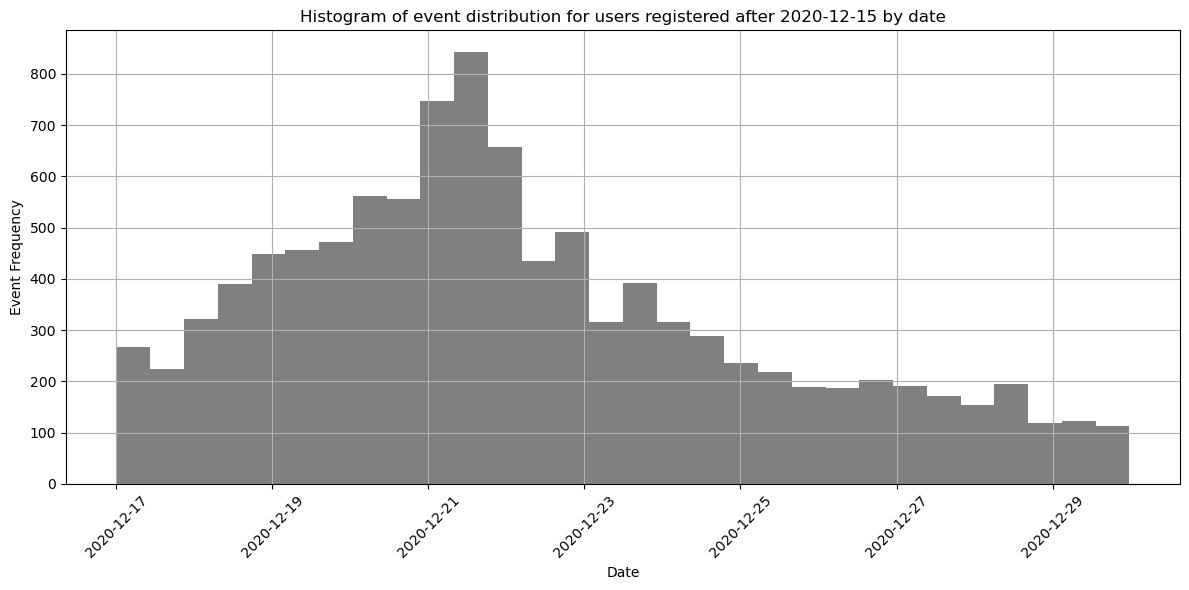

In [412]:
data = log_ab_lt.query("first_date > '2020-12-16'")
# Create a figure and axes for the plot
plt.figure(figsize=(12, 6))

# Create a histogram of event distribution by dates
plt.hist(data['event_dt'], bins=30, color='grey')
plt.title('Histogram of event distribution for users registered after 2020-12-15 by date')
plt.xlabel('Date')
plt.ylabel('Event Frequency')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

All users who registered after 2020-12-15 and didn't reach the full 14-day lifetime have mostly completed their main events by 23-24.12. We will not remove them.

### Final dataset

During the test correctness check, a new dataset log_ab_lt was created. It should contain data for users from Europe who registered from December 7 to December 21 and participated in the recommender_system_test, with logs for the period from December 7 to December 30. Let's verify this.

In [413]:
log_ab_lt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22620 entries, 0 to 26289
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           22620 non-null  object        
 1   group             22620 non-null  object        
 2   ab_test           22620 non-null  object        
 3   first_date        22620 non-null  datetime64[ns]
 4   region            22620 non-null  object        
 5   device            22620 non-null  object        
 6   day_of_week_text  22620 non-null  object        
 7   event_dt          22620 non-null  datetime64[ns]
 8   event_name        22620 non-null  object        
 9   details           3103 non-null   float64       
 10  event_age         22620 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(7)
memory usage: 2.1+ MB


In [414]:
display(log_ab_lt['region'].unique())
display(log_ab_lt['first_date'].min())
log_ab_lt['first_date'].max()

array(['EU'], dtype=object)

Timestamp('2020-12-07 00:00:00')

Timestamp('2020-12-21 00:00:00')

In [415]:
log_ab_lt.groupby('group')['user_id'].nunique()

group
A    2604
B     877
Name: user_id, dtype: int64

In [416]:
log_ab_lt.describe()

,details,event_age
count,3103.000000,22620.000000
mean,23.096671,2.832759
std,70.453655,3.326842
min,4.990000,0.000000
25%,4.990000,0.000000
50%,4.990000,2.000000
75%,9.990000,5.000000
max,499.990000,13.000000


In [417]:
log_ab_lt['event_dt'].max()

Timestamp('2020-12-29 23:38:29')

**Conclusions:**
- `log_ab_lt` reflects data on user logs registered from December 7 to December 21.
- It includes only users participating in the A/B testing of the recommendation system.
- All users are from Europe, which accounts for 15% of the originally registered Europeans.
- Not all users have a 14-day lifetime, but considering that the main events occur in the first 2-3 days after registration, it was decided not to exclude these users from the test.
- More than 40% of users registered and selected for the A/B test did not perform any further actions and were removed from `log_ab_lt`.
- Events performed more than 14 days after registration were removed from the table, reducing the log dates by 1 day, now covering the period from December 7 to December 29.
- Users from the competing test are also present in `log_ab_lt`. Those in group A of the competing test are considered a control group and are not influenced by the other test. Users in group B are evenly distributed between groups A and B of our test. It is assumed that their impact on the results will be equally distributed.
- Mondays and weekends are the days with peaks in user registrations.

## Exploratory Analysis

### Event Distribution in A and B

/var/folders/jl/p8x17ssj4h71lnjgz17cp51c0000gn/T/ipykernel_82456/1082129763.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



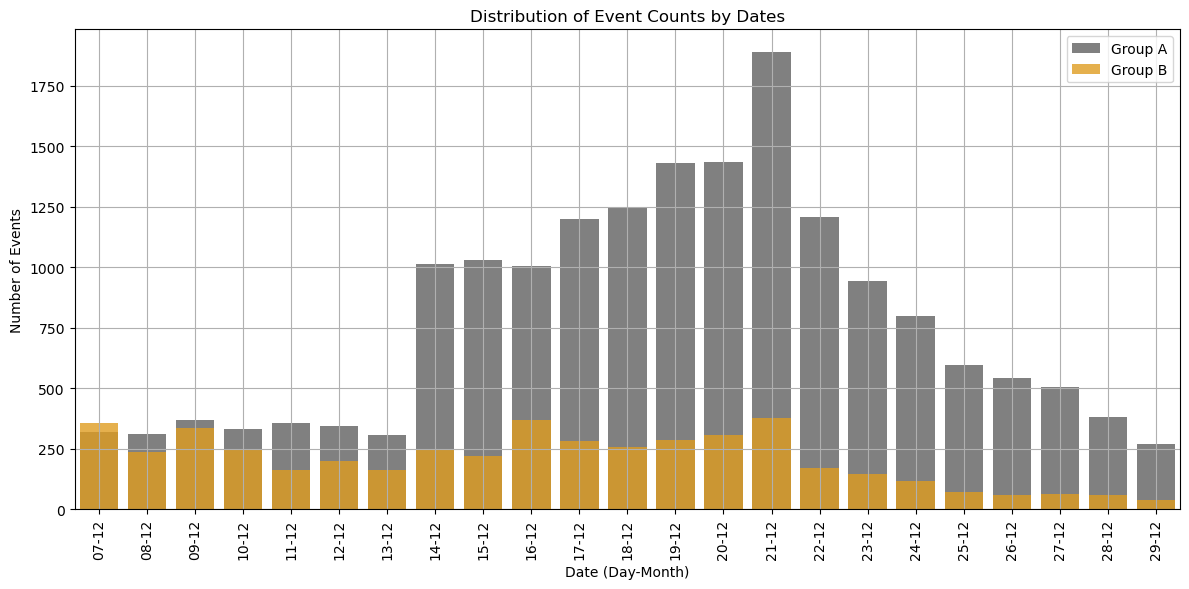

In [418]:
log_ab_lt['event_date'] = log_ab_lt['event_dt'].dt.strftime('%d-%m')  # Format day-month

# Grouping data by groups and dates and counting the number of events
event_counts = log_ab_lt.groupby(['group', 'event_date'])['event_date'].count().reset_index(name='event_count')

# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Histogram for group A
sns.barplot(data=event_counts[event_counts['group'] == 'A'], 
            x='event_date', y='event_count', ax=ax, color='grey', label='Group A')

# Histogram for group B
sns.barplot(data=event_counts[event_counts['group'] == 'B'], 
            x='event_date', y='event_count', ax=ax, color='orange', label='Group B', alpha=0.8)

ax.set_title('Distribution of Event Counts by Dates')
ax.set_xlabel('Date (Day-Month)')
ax.set_ylabel('Number of Events')
ax.grid(True)
plt.legend()

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The distribution shows that the number of events in group A is consistently higher, except on December 7th. In group A, the number of events sharply increases from the 14th to the 21st, and then decreases, while there are no significant spikes in group B.

In [419]:
#create a copy
log_ab_lt_copy = log_ab_lt.copy()
log_ab_lt_copy['event_dt'] = pd.to_datetime(log_ab_lt_copy['event_dt']).dt.strftime('%d/%m')
log_ab_lt_copy['first_date'] = pd.to_datetime(log_ab_lt_copy['first_date']).dt.strftime('%d/%m')
#two datasets: one for events by date and another for users.
u = log_ab_lt_copy.groupby(['event_dt','group'])['event_name'].count().reset_index()
regi = log_ab_lt_copy.groupby(['first_date','group'])['user_id'].nunique().reset_index()
merged = pd.merge(u, regi, left_on=['event_dt', 'group'], right_on=['first_date', 'group'], how='left')
merged_a = merged[merged['group']=='A']
merged_b = merged[merged['group']=='B']

We will visualize how the number of registered users and the number of events changed over time using two separate graphs.

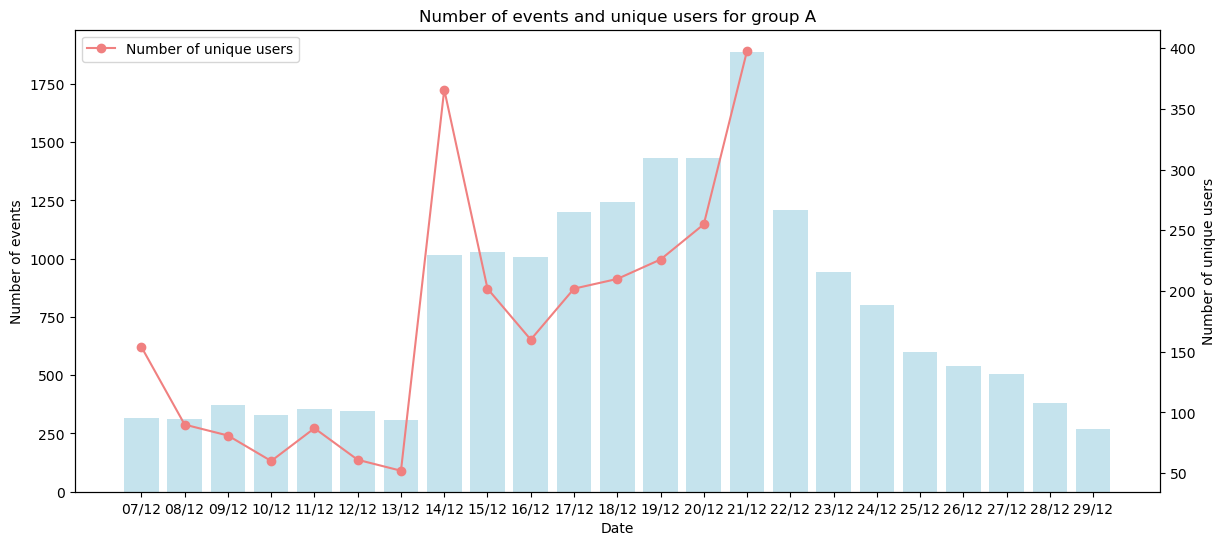

In [420]:
# Create a figure and axes for the graph
fig, ax1 = plt.subplots(figsize=(14, 6))

# Axis for events
ax1.bar(merged_a['event_dt'], merged_a['event_name'], color='lightblue', alpha=0.7, label='Number of events')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of events', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second axis for users
ax2 = ax1.twinx()
ax2.plot(merged_a['event_dt'], merged_a['user_id'], color='lightcoral', marker='o', label='Number of unique users')
ax2.set_ylabel('Number of unique users', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Add a common title and legend
plt.title('Number of events and unique users for group A', color='black')
plt.legend(loc='upper left')

plt.show()

**In Group A:**
- The peak in the number of user registrations was reached three times on the 7th, 14th, and 21st of December (on Mondays, as we remember).
- However, users who registered on December 7th did not create a peak in the number of events on that day or within the following 2-3 days. Nevertheless, as the number of registrations increased on the 12th, 13th, and 14th of December (weekend + Monday), we can observe a sharp increase in the number of events from December 14th to December 21st (1000-1750 events per day).
- Afterward, the number of events gradually decreases as there are no new users.

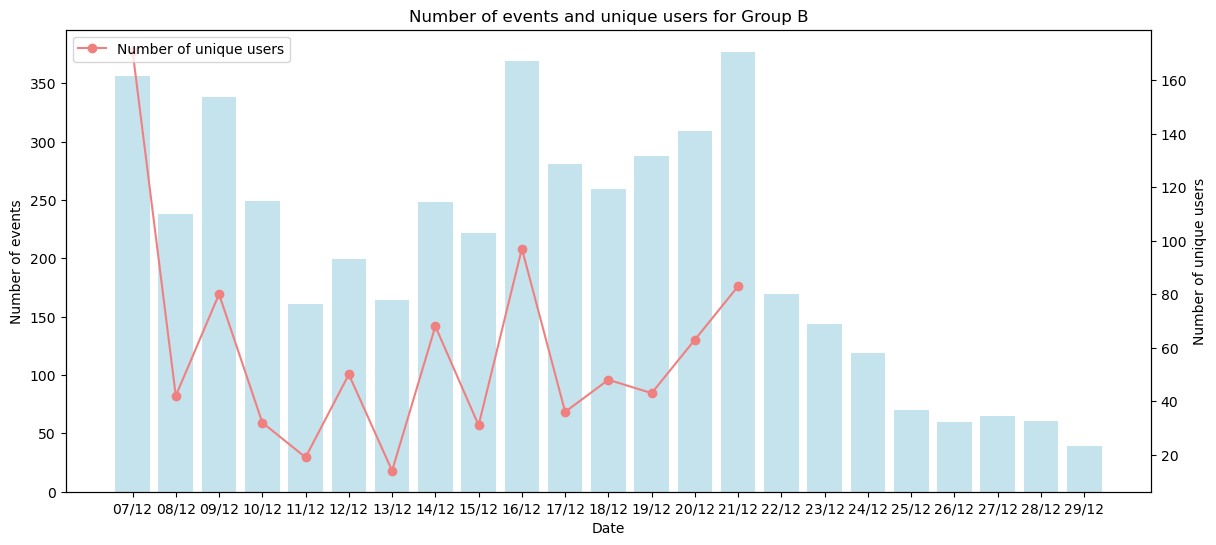

In [421]:
# Create a figure and axes for the plot
fig, ax1 = plt.subplots(figsize=(14, 6))

# Axis for events
ax1.bar(merged_b['event_dt'], merged_b['event_name'], color='lightblue', alpha=0.7, label='Number of events')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of events', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second axis for users
ax2 = ax1.twinx()
ax2.plot(merged_b['event_dt'], merged_b['user_id'], color='lightcoral', marker='o', label='Number of unique users')
ax2.set_ylabel('Number of unique users', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Add a common title and legend
plt.title('Number of events and unique users for Group B', color='black')
plt.legend(loc='upper left')

plt.show()

**In Group B:**

- **Registration Peaks:** The pattern of user registrations in Group B appears less stable and has one significant peak on 7th December.
- **Impact of Registrations on Events:** The maximum number of daily events (approximately 350) is reached on 7th and 9th December, 16th December, and 21st December, corresponding to the registration peaks.
- **Gradual Decline in Events:** Similar to Group A, after 21st December, the number of events in Group B starts to gradually decrease as no new users are added to the cohort.

### Event Distribution per User

Considering that there are more users in the control group, it's essential to look at the distribution concerning events per unique user.

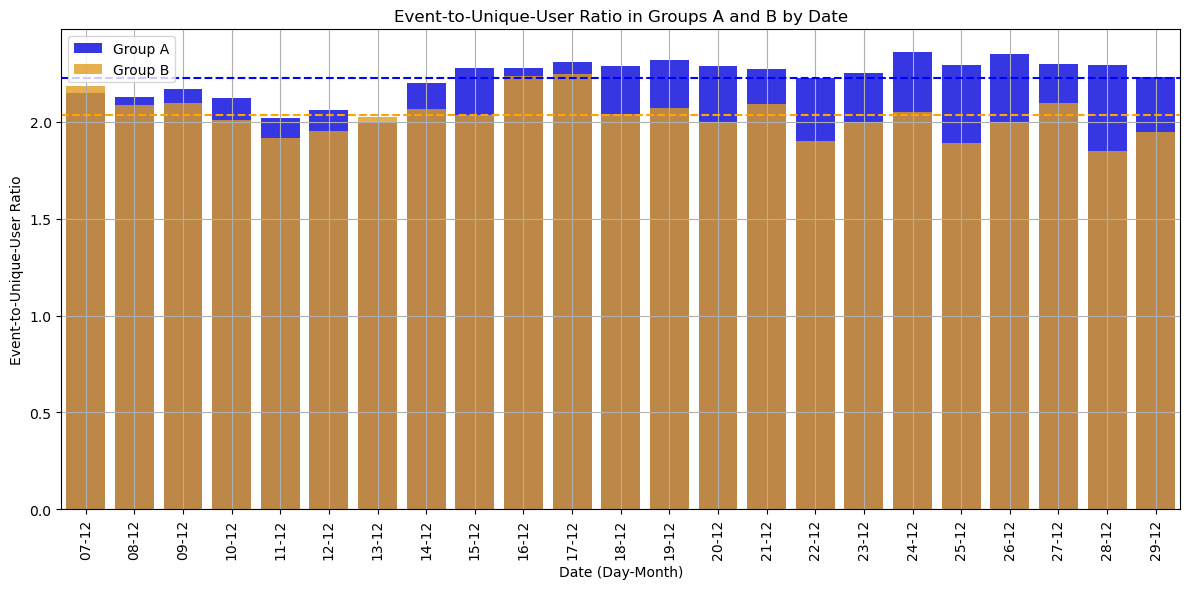

In [422]:
# Grouping data by group and date and calculating the number of events and unique users
event_user_counts = log_ab_lt.groupby(['group', 'event_date']).agg({'event_name': 'count', 'user_id': 'nunique'}).reset_index()
event_user_counts.columns = ['group', 'event_date', 'event_count', 'unique_users_count']

# Calculating the ratio of events to unique users
event_user_counts['event_ratio'] = event_user_counts['event_count'] / event_user_counts['unique_users_count']

# Create a figure and axes for the graph
fig, ax = plt.subplots(figsize=(12, 6))
group_A = event_user_counts[event_user_counts['group'] == 'A']
group_B = event_user_counts[event_user_counts['group'] == 'B']

# Bar plot of the ratio of events in groups A and B to the total number of events
sns.barplot(data=group_A, x='event_date', y='event_ratio', ax=ax, color='blue', label='Group A', alpha=0.9)
sns.barplot(data=group_B, x='event_date', y='event_ratio', ax=ax, color='orange', label='Group B', alpha=0.8)

ax.set_title('Event-to-Unique-User Ratio in Groups A and B by Date')
ax.set_xlabel('Date (Day-Month)')
ax.set_ylabel('Event-to-Unique-User Ratio')
ax.grid(True)
plt.legend()

# Horizontal line for the average value in group A
mean_ratio_A = group_A['event_ratio'].mean()
ax.axhline(y=mean_ratio_A, color='blue', linestyle='--', label='Average Value in Group A')

# Horizontal line for the average value in group B
mean_ratio_B = group_B['event_ratio'].mean()
ax.axhline(y=mean_ratio_B, color='orange', linestyle='--', label='Average Value in Group B')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

For each unique user who visited the store on December 7th and 13th, there are more events in Group B than in Group A. However, overall, there are still more events in Group A. We added an average line, which shows that the average number of events per unique user in Group A is greater than in Group B.

In [423]:
ev_u = log_ab_lt.groupby(['user_id','group'])['event_name'].count().reset_index()

In [424]:
# Data for groups A and B
data_group_A = ev_u[ev_u['group'] == 'A']['event_name']
data_group_B = ev_u[ev_u['group'] == 'B']['event_name']

# Conduct a t-test
t_statistic, p_value = stats.ttest_ind(data_group_A, data_group_B, equal_var=False)

# Results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Assess statistical significance
alpha = 0.05  # Significance level
if p_value < alpha:
    print("There are statistically significant differences between groups A and B.")
else:
    print("There are no statistically significant differences between groups A and B.")

T-statistic: 10.500921691919649
P-value: 4.665772030824358e-25
There are statistically significant differences between groups A and B.


The chart illustrates the difference in the event-to-unique user ratio between groups A and B over time. It's essential to note the following key points:

1. In the initial period (December 7-13), group B exhibits a higher event-to-unique user ratio than group A. This may indicate more active user engagement with the application in group B.

2. After December 14, the event-to-unique user ratio in group A starts to rise and even surpasses that of group B. This could be a result of increased activity by users in group A following the registration peaks.

3. Overall, group A maintains a higher average event-to-unique user ratio compared to group B.

The results of the t-test show statistically significant differences between groups A and B in terms of event_ratio. The p-value is very small (less than 0.05), indicating that the differences in event-to-unique user ratio between the groups are statistically significant.

**Therefore, based on the analysis of the chart and the results of the t-test, the following conclusions can be drawn**:

- In the initial period, group B has higher user activity, but group A starts increasing its activity after the registration peaks.
- The average event-to-unique user ratio is higher in group A.
- Statistical differences in event-to-unique user ratio between groups A and B are confirmed and are statistically significant.


### Marketing Campaigns influence

Let's examine the events that could have affected our test. To start, we will filter the dataset to understand which campaigns fell within the relevant period and region

In [425]:
marketing = calendar[(calendar['start_dt'] < '2021-01-04') & (calendar['finish_dt'] > '2020-12-07') & (calendar['regions'].str.contains('EU', case=False, regex=True))]
marketing = marketing.copy()
marketing['start_dt'] = marketing['start_dt'].dt.strftime('%d/%m')
marketing

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",25/12,2021-01-03


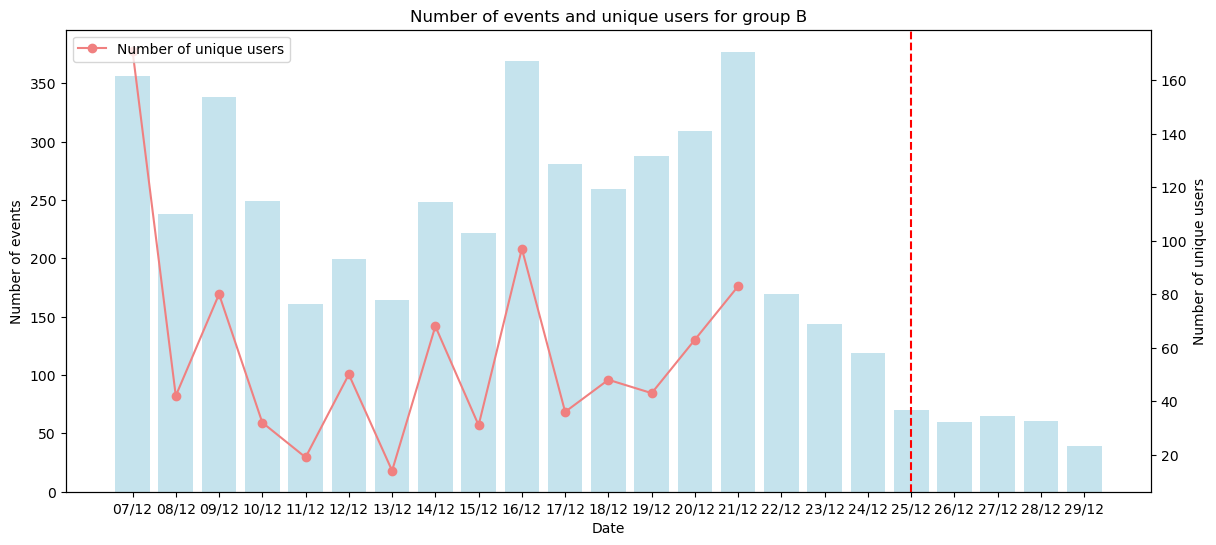

In [426]:
# Create a figure and axes for the plot
fig, ax1 = plt.subplots(figsize=(14, 6))

# Axis for events
ax1.bar(merged_b['event_dt'], merged_b['event_name'], color='lightblue', alpha=0.7, label='Number of events')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of events', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second axis for users
ax2 = ax1.twinx()
ax2.plot(merged_b['event_dt'], merged_b['user_id'], color='lightcoral', marker='o', label='Number of unique users')
ax2.set_ylabel('Number of unique users', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Extract the start date of the marketing campaign from the marketing table
marketing_start_date = marketing['start_dt'].iloc[0]

# Add a vertical line to mark the start of the marketing campaign
ax1.axvline(x=marketing_start_date, color='red', linestyle='--', label='Start of marketing campaign')

# Add a common title and legend
plt.title('Number of events and unique users for group B', color='black')
plt.legend(loc='upper left')

plt.show()

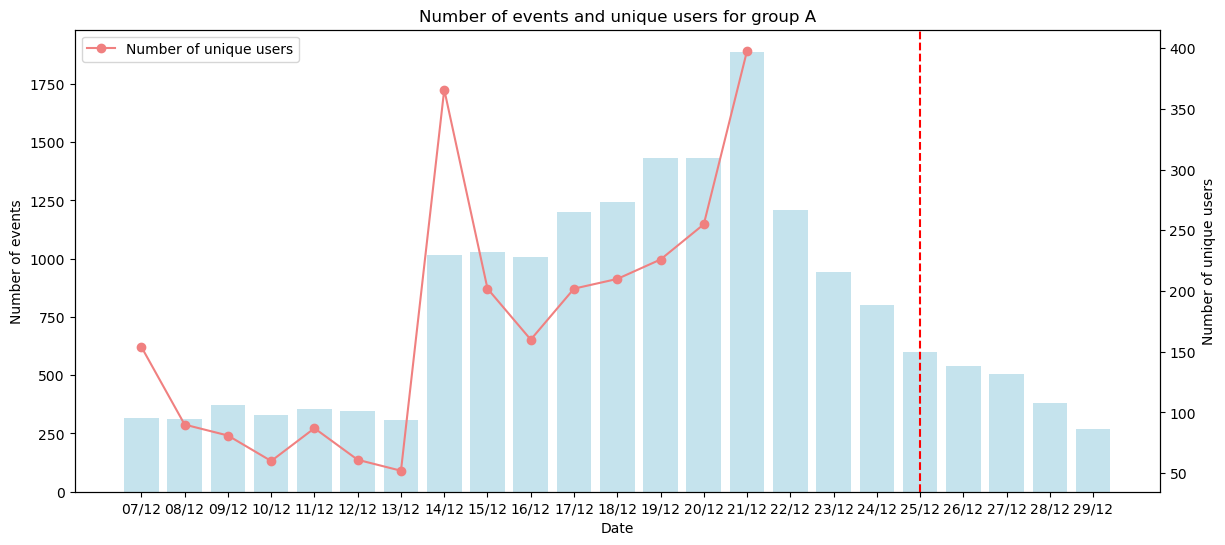

In [427]:
# Create a figure and axes for the plot
fig, ax1 = plt.subplots(figsize=(14, 6))

# Axis for events
ax1.bar(merged_a['event_dt'], merged_a['event_name'], color='lightblue', alpha=0.7, label='Number of events')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of events', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second axis for users
ax2 = ax1.twinx()
ax2.plot(merged_a['event_dt'], merged_a['user_id'], color='lightcoral', marker='o', label='Number of unique users')
ax2.set_ylabel('Number of unique users', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Extract the start date of the marketing campaign from the marketing table
marketing_start_date = marketing['start_dt'].iloc[0]

# Add a vertical line to mark the start of the marketing campaign
ax1.axvline(x=marketing_start_date, color='red', linestyle='--', label='Start of marketing campaign')

# Add a common title and legend
plt.title('Number of events and unique users for group A', color='black')
plt.legend(loc='upper left')

plt.show()

There is no impact on the number of events; they gradually decrease, as expected.

### Number of orders

In [428]:
# Filter data for group A
group_A_data = log_ab_lt[log_ab_lt['group'] == 'A']

# Group the data by date and count the number of orders for group A
orders_per_day_A = group_A_data[group_A_data['event_name'] == 'purchase'].groupby('event_date')['event_name'].count().reset_index()
orders_per_day_A.columns = ['date', 'ordersPerDateA']

# Filter data for group B
group_B_data = log_ab_lt[log_ab_lt['group'] == 'B']

# Group the data by date and count the number of orders for group B
orders_per_day_B = group_B_data[group_B_data['event_name'] == 'purchase'].groupby('event_date')['event_name'].count().reset_index()
orders_per_day_B.columns = ['date', 'ordersPerDateB']

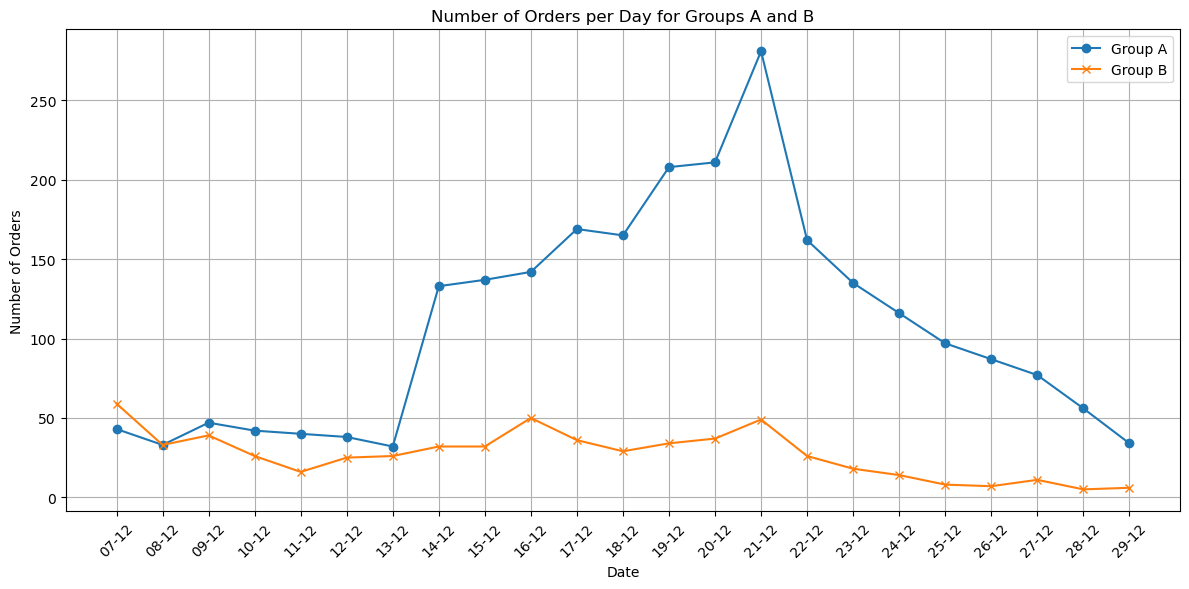

In [429]:
# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot for group A
ax.plot(orders_per_day_A['date'], orders_per_day_A['ordersPerDateA'], label='Group A', marker='o')

# Plot for group B
ax.plot(orders_per_day_B['date'], orders_per_day_B['ordersPerDateB'], label='Group B', marker='x')

# Customize the appearance of the plot
ax.set_xlabel('Date')
ax.set_ylabel('Number of Orders')
ax.set_title('Number of Orders per Day for Groups A and B')
ax.legend()

# Display the plot
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

The graph visually resembles the distribution of events by groups. Starting from December 14, the number of orders (as well as the number of registered users and events) sharply increases in Group A and remains the same in Group B. For the same reason, the number of orders increases. Let's check if this difference is statistically significant.

Let's formulate the hypotheses for the statistical test:
- Null Hypothesis (H0): There are no differences in the average number of orders between the groups 
- Alternative Hypothesis (H1): There are differences in the average number of orders between the groups.

In [430]:
ordersByUsersA = (
    log_ab_lt[(log_ab_lt['group'] == 'A') & (log_ab_lt['event_name'] == 'purchase')]
    .groupby('user_id', as_index=False)
    .agg({'event_name': 'count'})
)
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = (
    log_ab_lt[(log_ab_lt['group'] == 'B') & (log_ab_lt['event_name'] == 'purchase')]
    .groupby('user_id', as_index=False)
    .agg({'event_name': 'count'})
)
ordersByUsersB.columns = ['user_id', 'orders']

In [431]:
# Extract the orders data for groups A and B
ordersA = ordersByUsersA['orders']
ordersB = ordersByUsersB['orders']

# Perform the Mann-Whitney U test
results = stats.mannwhitneyu(ordersA, ordersB)

# Display the test results
print("Mann-Whitney U test results:")
print("U-statistic:", results.statistic)
print("P-value:", results.pvalue)

# Define the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to make a decision
if results.pvalue < alpha:
    print("Reject the null hypothesis: There are statistically significant differences in the average number of orders between groups A and B.")
else:
    print("Fail to reject the null hypothesis: There are no statistically significant differences in the average number of orders between groups A and B.")

Mann-Whitney U test results:
U-statistic: 128559.0
P-value: 3.0668409834142144e-09
Reject the null hypothesis: There are statistically significant differences in the average number of orders between groups A and B.


The Mann-Whitney U test results indicate that there are statistically significant differences in the average number of orders between groups A and B. This means that the two groups have significantly different ordering behaviors. 

### Average Order Value

- Null Hypothesis: There are no differences in the average order value between groups.
- Alternative Hypothesis: There are differences in the average order value between groups.

To calculate the statistical significance of differences in the average order value, we will provide the revenue data from orders to the mannwhitneyu() criterion. Additionally, we will find the relative differences in the average order value between the groups.

In [432]:
revenueA = log_ab_lt[(log_ab_lt['group'] == 'A') & (log_ab_lt['event_name'] == 'purchase')]['details']
revenueB = log_ab_lt[(log_ab_lt['group'] == 'B') & (log_ab_lt['event_name'] == 'purchase')]['details']

p_value_revenue = stats.mannwhitneyu(revenueA, revenueB)[1]

mean_revenueA = revenueA.mean()
mean_revenueB = revenueB.mean()
relative_difference = (mean_revenueB / mean_revenueA) - 1

print('p-value for average order value = ', "{0:.3f}".format(p_value_revenue))
print('Relative difference in average order value between groups B and A = ', "{0:.3f}".format(relative_difference))

p-value for average order value =  0.696
Relative difference in average order value between groups B and A =  -0.003


In [433]:
# Conducting the Shapiro-Wilk test for the revenueA and revenueB data
shapiro_test_A = shapiro(revenueA)
shapiro_test_B = shapiro(revenueB)

# Displaying the test results
print("Shapiro-Wilk test for group A: p-value =", shapiro_test_A[1])
print("Shapiro-Wilk test for group B: p-value =", shapiro_test_B[1])

Shapiro-Wilk test for group A: p-value = 0.0
Shapiro-Wilk test for group B: p-value = 5.044674471569341e-44


1. The p-value for the average order value is 0.696, which is significantly higher than the standard significance level of 0.05. This means that there are no statistically significant differences in the average order value between groups A and B.

2. The relative difference in average order value between group B and A is -0.003, indicating that the average order value in group B is slightly lower than in group A, but this difference is practically negligible.

In summary, based on the conducted analysis, it can be concluded that there are no differences in the average order value between groups A and B, and any observed distinctions are likely due to random variation.

In [434]:
log_ab_lt['details'].unique()

array([ 99.99,    nan,   4.99,   9.99, 499.99])

Additionally, I would like to note that the variability in check amounts is extremely low, with only four different price points.

### Funnel

Let's see how the events are distributed throughout the funnel when analyzing the entire dataset.

In [435]:
funnel= log_ab_lt.groupby('event_name')['user_id'].nunique().reset_index()
funnel.columns = ['event', 'unique_users']
total_users = log_ab_lt['user_id'].nunique()
funnel['user_share'] = funnel['unique_users'] / total_users
funnel.round(3)

,event,unique_users,user_share
0,login,3480,1.000
1,product_cart,1026,0.295
2,product_page,2178,0.626
3,purchase,1082,0.311


In [436]:
total_users

3481

If we consider all users who logged in as 100%, approximately 31% of them reach the purchase step. Moreover, users can skip some stages, entering the funnel stage, for example, through a direct link, and so on. Let's look at the values for different groups.

In [437]:
funnelA = group_A_data.groupby('event_name')['user_id'].nunique().reset_index()
funnelA.columns = ['event', 'unique_users']
total_A = group_A_data['user_id'].nunique()
funnelA['user_share'] = funnelA['unique_users'] / total_A
funnelA.round(3)

,event,unique_users,user_share
0,login,2604,1.000
1,product_cart,782,0.300
2,product_page,1685,0.647
3,purchase,833,0.320


In [438]:
total_A

2604

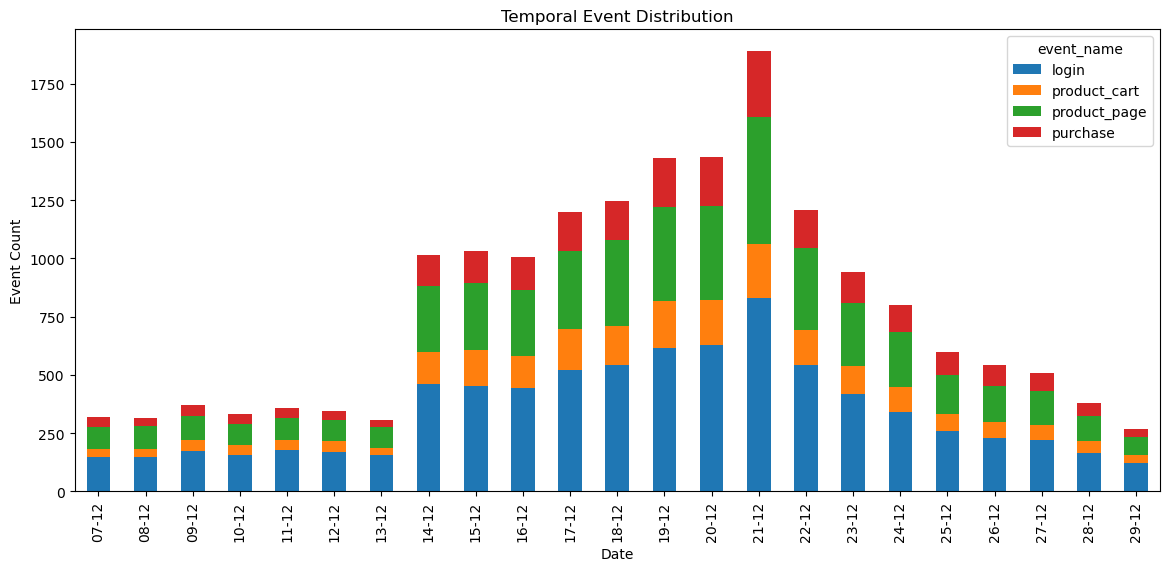

In [439]:
events_per_dateA = group_A_data.groupby(['event_date', 'event_name'])['user_id'].count().reset_index()
events_per_date_pivot = events_per_dateA.pivot(index='event_date', columns='event_name', values='user_id')
events_per_date_pivot.plot(kind='bar', stacked=True, figsize=(14, 6))
plt.xlabel('Date')
plt.ylabel('Event Count')
plt.title('Temporal Event Distribution')
plt.show()

The chart shows how events are distributed by days in group A, depending on the event type. Login and Product Page occupy the majority of each column, and all 4 events occur every day.

In [440]:
funnelB = group_B_data.groupby('event_name')['user_id'].nunique().reset_index()
funnelB.columns = ['event', 'unique_users']
total_B = group_B_data['user_id'].nunique()
funnelB['user_share'] = funnelB['unique_users'] / total_B
funnelB.round(3)

,event,unique_users,user_share
0,login,876,0.999
1,product_cart,244,0.278
2,product_page,493,0.562
3,purchase,249,0.284


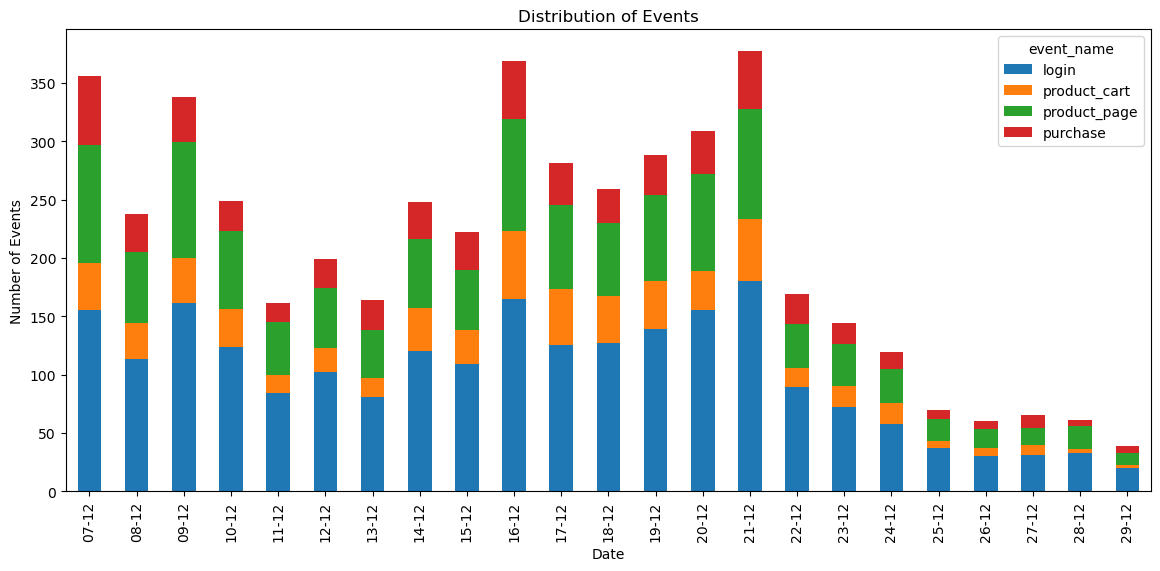

In [441]:
events_per_dateB = group_B_data.groupby(['event_date', 'event_name'])['user_id'].count().reset_index()
events_per_date_pivotB = events_per_dateB.pivot(index='event_date', columns='event_name', values='user_id')
events_per_date_pivotB.plot(kind='bar', stacked=True, figsize=(14, 6))
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.title('Distribution of Events')
plt.show()

The chart shows how events are distributed by day in group B, depending on the type of event. Login and Product Page dominate the majority of each column, and all four events occur every day.

In [444]:
funnelA['group'] = 'Group A'
funnelB['group'] = 'Group B'

# order
event_order = ['purchase', 'product_cart', 'product_page', 'login']
# merge
funnel_combined = pd.concat([funnelA, funnelB])

# funnel
fig = px.funnel(funnel_combined, x='user_share', y='event', text='user_share', color='group', category_orders={'event': event_order})
fig.update_traces(texttemplate='%{text:.2%}', textposition='inside')
fig.update_layout(title='Funnel for A and B', title_x=0.5)
fig.show()

So, from the funnel, it's clear that the shares of unique users at each stage of the funnel look similar for groups A and B, and there is no significant skew. More than 56% of users from the test group proceed to the Product Page, and slightly less than 30% of users from group B make purchases.

### Statistical Difference in User Shares at Each Funnel Step

Let's formulate and test hypotheses:
1. H0 The proportions of users who performed a login in groups A and B are equal.
2. H1 The proportions of users who performed a login in groups A and B are different.

In [357]:
# group A
funnelA = group_A_data.groupby('event_name')['user_id'].nunique().reset_index()
funnelA.columns = ['event', 'unique_users_A']

# group B
funnelB = group_B_data.groupby('event_name')['user_id'].nunique().reset_index()
funnelB.columns = ['event', 'unique_users_B']
funnel_AB = pd.merge(funnelA, funnelB, on='event')
funnel_AB['share_A'] = funnel_AB['unique_users_A'] / total_A
funnel_AB['share_B'] = funnel_AB['unique_users_B'] / total_B

In [446]:
for index, row in funnel_AB.iterrows():
    count = np.array([row['unique_users_A'], row['unique_users_B']])
    nobs = np.array([total_A, total_B])
    z_stat, p_value = proportions_ztest(count, nobs)
    print(count, nobs)
    
    print(f"step: {row['event']}")
    print(f"Z-s: {z_stat}")
    print(f"P-value: {p_value}")
    print("-" * 30)

[2604  876] [2604  877]
step: login
Z-s: 1.7233880726932327
P-value: 0.08481837035887359
------------------------------
[782 244] [2604  877]
step: product_cart
Z-s: 1.2407667698576503
P-value: 0.21469192029582396
------------------------------
[1685  493] [2604  877]
step: product_page
Z-s: 4.495436444894488
P-value: 6.94273935952599e-06
------------------------------
[833 249] [2604  877]
step: purchase
Z-s: 1.9906004806163913
P-value: 0.04652482738393029
------------------------------


- At the "login" step, there are no statistically significant differences in the proportions of users between groups A and B (p-value is greater than 0.05).

- At the "product_cart" step, there are also no statistically significant differences in the proportions of users between groups A and B (p-value is greater than 0.05).

- At the "product_page" step, there are statistically significant differences in the proportions of users between groups A and B (p-value is less than 0.05). This may indicate significant differences in user behavior at this stage of the funnel.

- At the "purchase" step, statistically significant differences in the proportions of users between groups A and B are also observed (p-value is less than 0.05).

Thus, the differences between groups A and B are statistically significant at the "product_page" and "purchase" steps, which may indicate the group's impact on conversion at these funnel stages.

If we talk about the expected result - an increase in conversion in Group B by 10%, then we can conclude that the conversion in Group B is decreasing rather than increasing.

## Conclusions

**Conclusions:**

- During the analysis of an online store's logs, the dataset was cleaned and analyzed.
- For the final analysis, data for the period from December 7th to December 29th were used, specifically for users from Europe who registered between December 7th and December 21st.
- The majority of events were performed by users in the first 2-3 days after registration, with the number of events decreasing over time.
- The behavior of 2,604 users from the control group A and 877 users from group B was analyzed.
- Users were selected unevenly, although cyclicality was observed with increased registrations on Mondays, which was more pronounced in group A.
- More than 45% of users selected for the test did not perform any actions after registration, significantly reducing the number of analyzed active users and decreasing the test's power.
- Some users were involved in multiple tests simultaneously, which could have influenced the results.

**Research Findings:**
- In group A, the number of actions per user is higher than in the test group, and this difference is statistically significant.
- Group B has a significantly lower average number of orders per user compared to group A, and this difference is statistically significant.
- During the test period, a marketing campaign was simultaneously launched, but it did not affect the research results.
- The average check in group B is slightly lower; however, this difference is not significant. The price range in the dataset is small.
- Conversion rates at different steps of the funnel are lower for group B compared to group A. Notably, significant differences in the proportions of users between groups A and B were identified at the "product_page" and "purchase" steps. This may indicate a problem or low effectiveness of the test group at these stages.

**Conclusion:** The changes tested in group B should be rejected, and the test can be considered successful.

**Additional Notes:**

- The test could have been more informative if it considered the 15% of logged-in users rather than all registered users from the EU.
- In general, it's worth investigating the reasons why users do not return to the online store after registration.
- Additionally, in the future, it's essential to exclude the possibility of the same users participating in different tests as it could distort the results.
- User activity and the average age of events suggest that users are active during the first few days after registration. It might be worthwhile to further encourage users to interact with the online store after the first week following registration.

[Tableau visualization](https://public.tableau.com/app/profile/tatyana.mayorova/viz/NumberofBuildingsbyUsers/Dashboard1)